In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nike-sales-nti15/Nike Dataset.csv


In [11]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = '/kaggle/input/nike-sales-nti15/Nike Dataset.csv'
data = pd.read_csv(file_path)

# 1. Check for missing values
missing_values = data.isnull().sum()
# 2. Handle missing values
# Fill missing numeric values with the mean and categorical with the mode
data['Price per Unit'] = data['Price per Unit'].fillna(data['Price per Unit'].mean())
data['Total Sales'] = data['Total Sales'].fillna(data['Total Sales'].mean())
data['Units Sold'] = data['Units Sold'].fillna(data['Units Sold'].mean())
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])
data['Retailer'] = data['Retailer'].fillna(data['Retailer'].mode()[0])
data['Sales Method'] = data['Sales Method'].fillna(data['Sales Method'].mode()[0])
data['State'] = data['State'].fillna(data['State'].mode()[0])

# 3. Remove duplicates
data.drop_duplicates(inplace=True)

# 4. Standardize date formats in 'Invoice Date'
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], errors='coerce')

# 5. Check for any invalid dates that couldn't be parsed
invalid_dates = data[data['Invoice Date'].isnull()]

# 6. Remove rows with invalid dates
data.dropna(subset=['Invoice Date'], inplace=True)

# 7. Check for outliers using z-score
numeric_columns = ['Price per Unit', 'Total Sales', 'Units Sold']
z_scores = stats.zscore(data[numeric_columns])
data = data[(abs(z_scores) < 3).all(axis=1)]  # Remove outliers with z-score greater than 3


# Optionally, save the cleaned data to a new CSV file
cleaned_file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")



Cleaned data saved to /kaggle/working/Nike_Cleaned_Dataset.csv


Cleaned Data:
  Invoice Date                    Product     Region     Retailer  \
0   2020-04-01  Women's Athletic Footwear  Northeast  Foot Locker   
1   2020-08-01    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
3   2020-02-02    Women's Street Footwear  Northeast  Foot Locker   
4   2020-03-02  Women's Athletic Footwear  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              45         3825          85  
1       Outlet  New York              50         4500          90  
2       Outlet  New York              50         4500          90  
3       Outlet  New York              40         3600          90  
4       Outlet  New York              45         3713          83  

Training Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Training Set):
              precision    recall  f1-scor

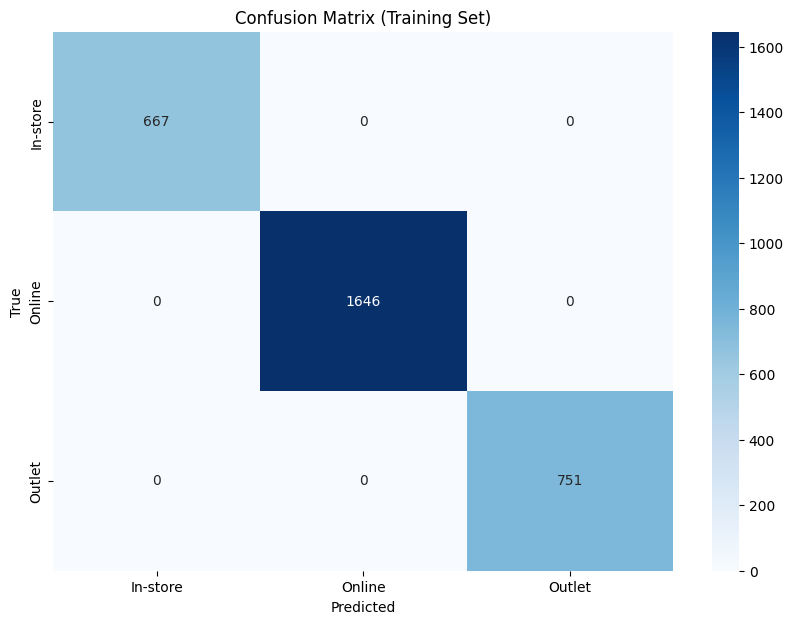

In [12]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the cleaned dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Cleaned Data:")
print(data.head())

# Define features (X) and target (y)
# Using 'Sales Method' as target, others as features
X = data.drop(columns=['Sales Method'])  # Exclude target variable
y = data['Sales Method']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Code
# Train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Performance:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

# Generate a classification report for the training set
class_report_train = classification_report(y_train, y_train_pred, target_names=model.classes_)
print("\nClassification Report (Training Set):")
print(class_report_train)

# Visualize the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Testing Performance:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Classification Report (Testing Set):
              precision    recall  f1-score   support

    In-store       0.98      0.98      0.98       173
      Online       0.90      0.91      0.90       377
      Outlet       0.82      0.81      0.81       217

    accuracy                           0.89       767
   macro avg       0.90      0.90      0.90       767
weighted avg       0.89      0.89      0.89       767



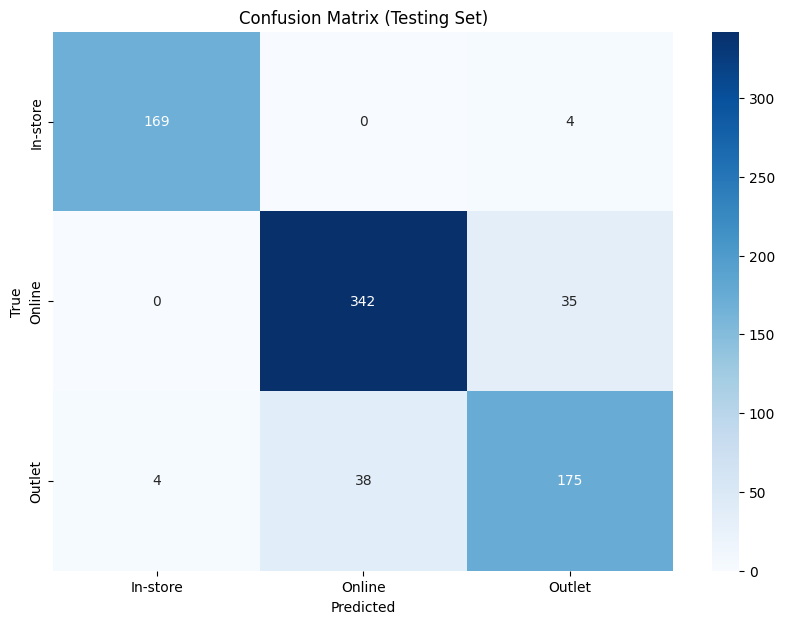

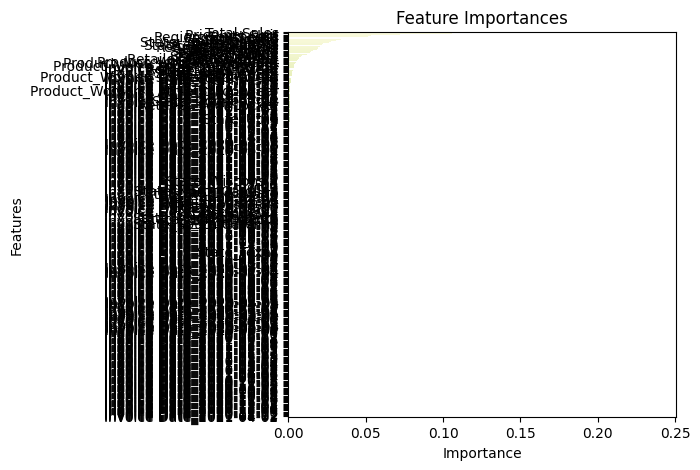

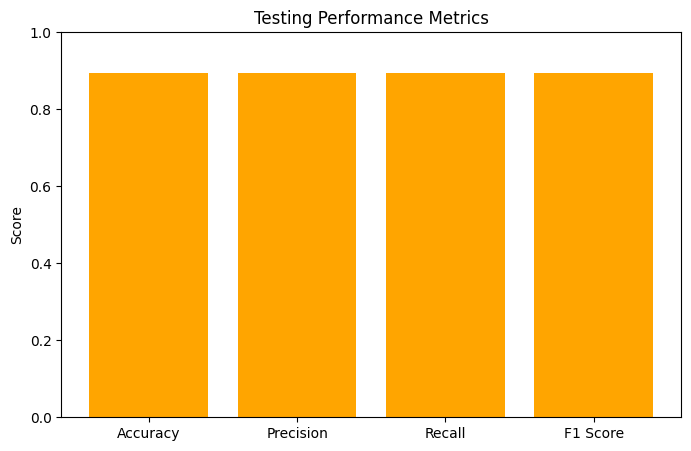

In [13]:
# Testing Code
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance on the testing set
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')

print("\nTesting Performance:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

# Generate a classification report for the testing set
class_report_test = classification_report(y_test, y_pred, target_names=model.classes_)
print("\nClassification Report (Testing Set):")
print(class_report_test)

# Visualize the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize feature importances as a bar chart
importances = model.feature_importances_
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index, palette='YlGnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualize performance metrics using a bar chart for testing performance
metrics = {
    'Accuracy': accuracy_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1 Score': f1_test
}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='orange')
plt.title('Testing Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Save the model, scaler, and label encoder for later use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Training completed and model saved.")


Training completed and model saved.


Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98       594
         Low       0.96      1.00      0.98       556

    accuracy                           0.98      1150
   macro avg       0.98      0.98      0.98      1150
weighted avg       0.98      0.98      0.98      1150

Confusion Matrix:
[[569  25]
 [  2 554]]


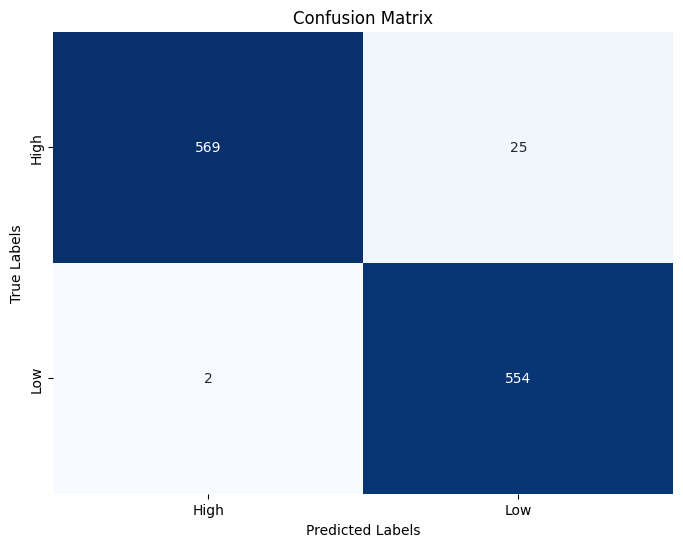


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


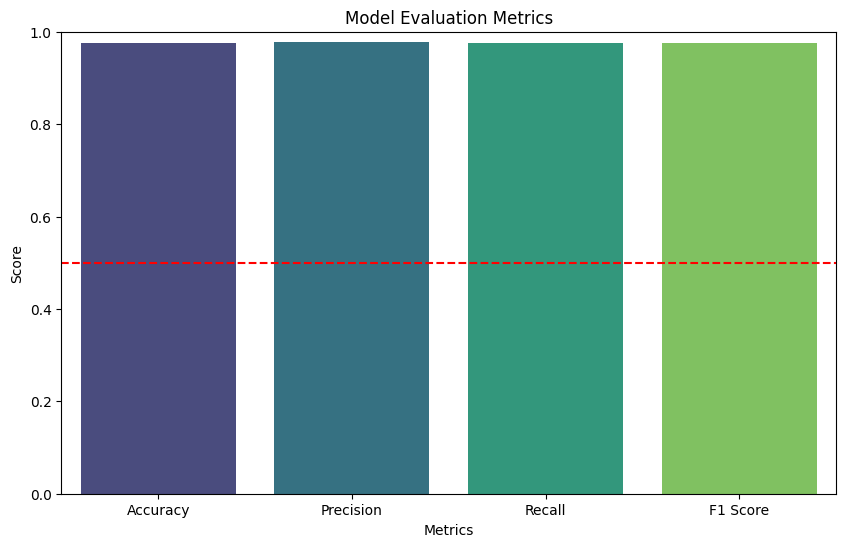

In [15]:
import pandas as pd
import joblib
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model, scaler, and label encoder
scaler = joblib.load('scaler.pkl')
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Load the dataset (again, as we only saved the model and scaler)
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
y = label_encoder.transform(y)

# Standardize the features using the previously fitted scaler
X_scaled = scaler.transform(X)

# Split the data into training and test sets (using the same split as during training)
# Alternatively, you can directly use the test data from the original split above.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Predict on the test set
y_pred = svm_model.predict(X_test)

# Step 3: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_sample

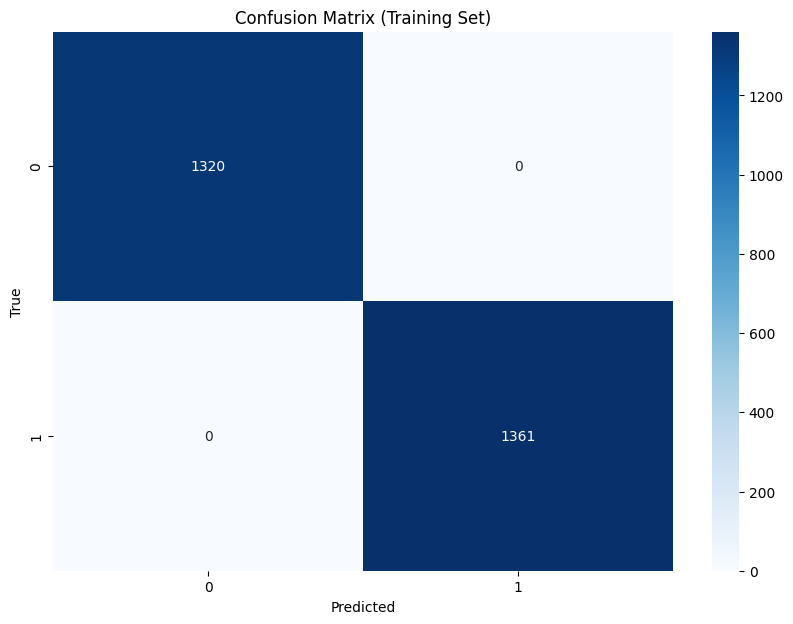


Testing Performance (Best Model):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150



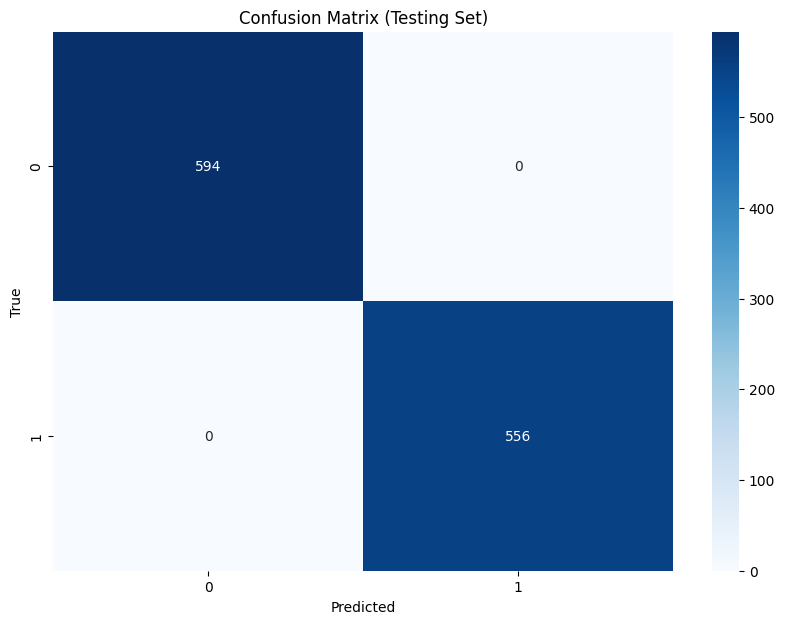

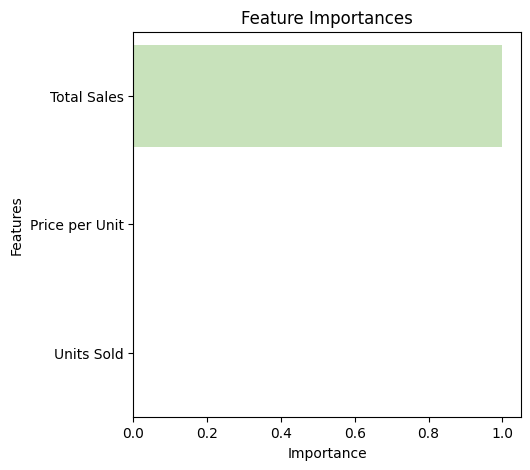

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model and its parameters
best_dt_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

# Make predictions with the best model
y_train_pred = best_dt_model.predict(X_train)
y_pred = best_dt_model.predict(X_test)

# Evaluate the model performance on training set
print("\nTraining Performance (Best Model):")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted'):.2f}")

# Generate classification report and confusion matrix for training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Visualize confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt_model.classes_, yticklabels=best_dt_model.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model performance on testing set
print("\nTesting Performance (Best Model):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Generate classification report and confusion matrix for testing set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt_model.classes_, yticklabels=best_dt_model.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize feature importances of the best model
importances = best_dt_model.feature_importances_
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index, palette='YlGnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Optimization completed and model saved.
Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       594
         Low       1.00      1.00      1.00       556

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150

Confusion Matrix:
[[593   1]
 [  2 554]]


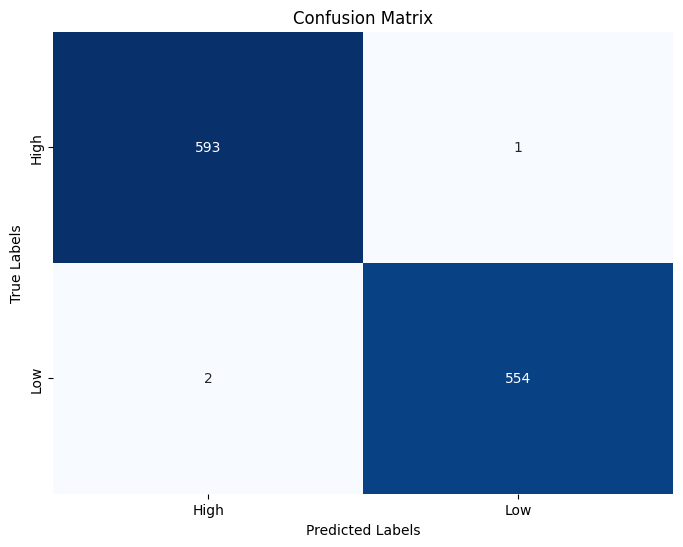


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


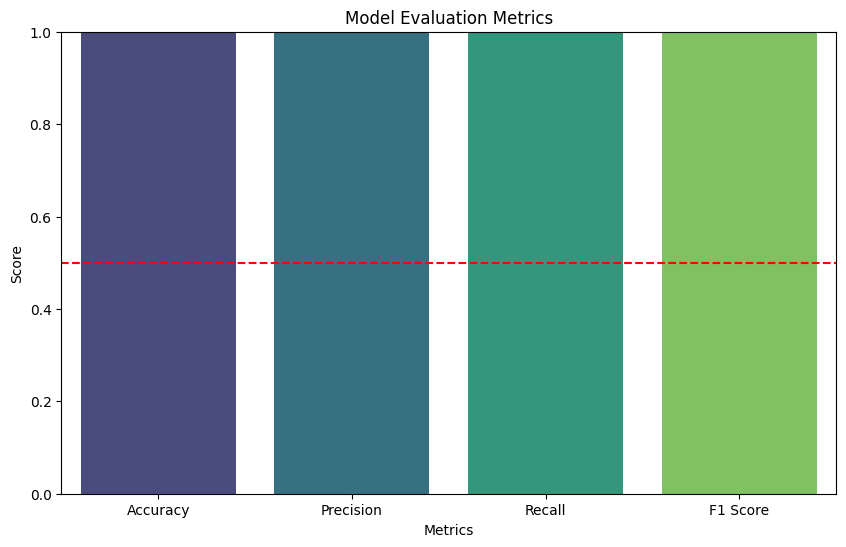

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (if using polynomial kernel)
    'class_weight': [None, 'balanced'],  # Class weights
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model with the best hyperparameters found
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Save the optimized model, scaler, and label encoder for later use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Optimization completed and model saved.")
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 3: Model Evaluation
y_pred = best_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       594
         Low       1.00      1.00      1.00       556

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150

Confusion Matrix:
[[594   0]
 [  0 556]]


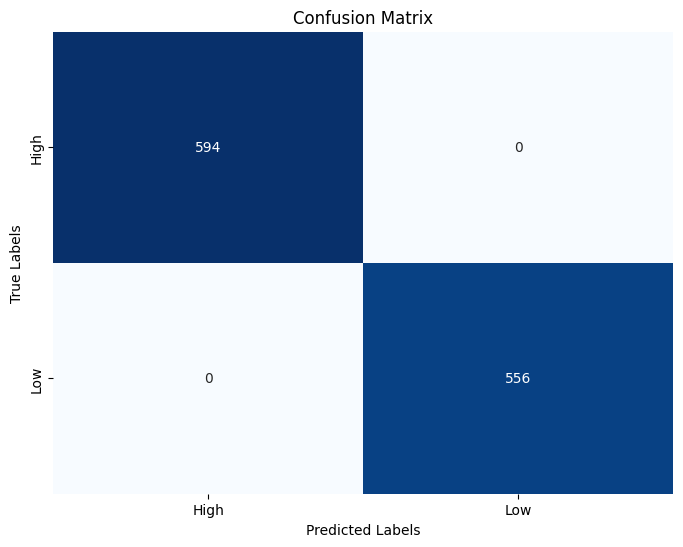


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


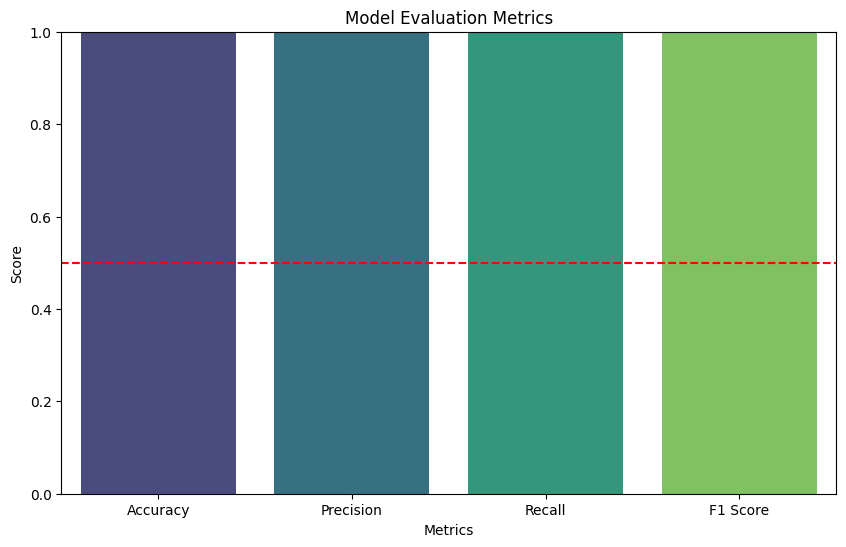

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Bagging with DecisionTreeClassifier
# Initialize the base classifier (DecisionTreeClassifier)
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=dt_model, n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
bagging_model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = bagging_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()
